In [ ]:
#necessary imports
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
!pip install pgmpy
from pgmpy.models import BayesianNetwork
import networkx as nx
from IPython.display import Image, display
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from pgmpy.estimators import PC
from pgmpy.inference import VariableElimination
from pgmpy.models import BayesianNetwork
import pickle
pip install pgmpy pandas scikit-learn
from pgmpy.metrics import correlation_score, log_likelihood_score, structure_score, fisher_c
from pgmpy.estimators import CITests
from pgmpy.metrics import correlation_score
from sklearn.metrics import accuracy_score
from pgmpy.estimators import BicScore, K2Score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.8/160.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 760.0/760.0 kB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 110.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.6/316.6 kB 19.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behav

#DATA EXPLORATION AND DATA HANDELING


In [ ]:
# Load the dataset from a CSV file into a DataFrame
data = pd.read_csv("/content/chicago_traffic_tracker_historical_congestion_estimates_by_segment_2018_current_1.csv")

# Display the first 5 rows of the DataFrame to get an overview of the data
print(data.head())

# Print the shape of the DataFrame (rows, columns) to understand the data size
print(data.shape)

# Print the column names to see the available data attributes
print(data.columns)

                  time  segment_id  speed  street direction  \
0  2018-03-21T17:31:29        1133     23  Cicero        SB   
1  2018-03-21T17:31:29        1134     20  Cicero        SB   
2  2018-03-21T17:31:29        1151     20  Harlem        NB   
3  2018-03-21T17:31:29        1152     23  Harlem        NB   
4  2018-03-21T17:31:29        1153     14  Harlem        NB   

           from_street  to_street  length street_heading             comments  \
0               Cermak       31st    1.00              S  Outside City Limits   
1            Roosevelt     Cermak    1.02              S  Outside City Limits   
2              Madison    Chicago    1.01              S  Outside City Limits   
3              Chicago  North Ave    1.01              N  Outside City Limits   
4  Forest Preserve Ave   Gunnison    1.00              N  Outside City Limits   

   ...  start_longitude  end_latitude  end_longitude  \
0  ...       -87.744434     41.836747     -87.743932   
1  ...       -87.74498

In [ ]:
data.describe()

,segment_id,speed,length,bus_count,message_count,hour,day_of_week,month,start_latitude,start_longitude,end_latitude,end_longitude,community_areas,zip_codes,wards
count,704650.000000,704650.000000,704650.000000,704649.000000,704649.000000,704649.000000,704649.000000,704649.0,704649.000000,704649.000000,704649.000000,704649.000000,660903.000000,704649.000000,660903.000000
mean,595.162624,13.469478,0.527221,0.982082,5.543253,11.202331,3.411656,3.0,41.849933,-87.680737,41.849995,-87.680745,40.358516,17953.776608,26.123445
std,379.591946,13.720662,0.182042,1.401086,9.400443,6.890073,2.118703,0.0,0.085634,0.058704,0.085671,0.058716,20.049718,6388.627103,14.837412
min,1.000000,-1.000000,0.070000,0.000000,0.000000,0.000000,1.000000,3.0,41.658970,-87.836765,41.659006,-87.836834,1.000000,2733.000000,1.000000
25%,271.000000,-1.000000,0.500000,0.000000,0.000000,5.000000,2.000000,3.0,41.785936,-87.724857,41.785936,-87.724854,25.000000,14920.000000,12.000000
50%,549.000000,16.000000,0.500000,1.000000,3.000000,11.000000,3.000000,3.0,41.859912,-87.669074,41.859912,-87.669050,37.000000,21546.000000,28.000000
75%,890.000000,25.000000,0.530000,1.000000,8.000000,17.000000,4.000000,3.0,41.910629,-87.635627,41.910629,-87.635260,58.000000,22248.000000,38.000000
max,1309.000000,57.000000,1.540000,34.000000,310.000000,23.000000,7.000000,3.0,42.012831,-87.535052,42.012829,-87.535052,77.000000,26624.000000,50.000000


In [ ]:
# Remove any leading and trailing whitespace from the column names
data.columns = data.columns.str.strip()

# Print the cleaned column names to verify whitespace removal
print(data.columns)

Index(['time', 'segment_id', 'speed', 'street', 'direction', 'from_street',
       'to_street', 'length', 'street_heading', 'comments', 'bus_count',
       'message_count', 'hour', 'day_of_week', 'month', 'record_id',
       'start_latitude', 'start_longitude', 'end_latitude', 'end_longitude',
       'start_location', 'end_location', 'community_areas', 'zip_codes',
       'wards', 'start_location_2', 'end_location_2'],
      dtype='object')


In [ ]:
# Convert the 'time' column to datetime format for easier time-based operations
data['time'] = pd.to_datetime(data['time'])

# Drop unnecessary columns that are not relevant to the analysis
# The 'errors="ignore"' argument ensures no error is raised if a column isn't found
data = data.drop(columns=[
    'street', 'from_street', 'to_street', 'street_heading', 'message_count',
    'comments', 'community_areas', 'wards', 'record_id', 'start_latitude',
    'start_longitude', 'end_latitude', 'end_longitude', 'start_location',
    'end_location', 'zip_codes', 'start_location_2', 'end_location_2'
], errors='ignore')

In [ ]:
data.columns

Index(['time', 'segment_id', 'speed', 'direction', 'length', 'bus_count',
       'hour', 'day_of_week', 'month'],
      dtype='object')

In [ ]:
# Loop through the specified columns to handle missing values
for column in ['time', 'segment_id', 'speed', 'direction', 'bus_count', 'hour',
               'day_of_week', 'month']:
    # Find the mode (most common value) of the current column
    mode_value = data[column].mode()[0]

    # Fill any missing values in the current column with the mode
    data[column].fillna(mode_value, inplace=True)


In [ ]:
print("Shape of the final DataFrame:", data.shape)
print(data.head())
print("Missing values in each column:\n", data.isnull().sum())

Shape of the final DataFrame: (704650, 9)
                 time  segment_id  speed direction  length  bus_count  hour  \
0 2018-03-21 17:31:29        1133     23        SB    1.00        3.0  17.0   
1 2018-03-21 17:31:29        1134     20        SB    1.02        2.0  17.0   
2 2018-03-21 17:31:29        1151     20        NB    1.01        1.0  17.0   
3 2018-03-21 17:31:29        1152     23        NB    1.01        1.0  17.0   
4 2018-03-21 17:31:29        1153     14        NB    1.00        3.0  17.0   

   day_of_week  month  
0          4.0    3.0  
1          4.0    3.0  
2          4.0    3.0  
3          4.0    3.0  
4          4.0    3.0  
Missing values in each column:
 time           0
segment_id     0
speed          0
direction      0
length         0
bus_count      0
hour           0
day_of_week    0
month          0
dtype: int64


In [ ]:
pip install pydot

In [ ]:
model = BayesianNetwork()
model.add_nodes_from(['segment_id','direction','D_encoded','T_encoded'])
model.add_nodes_from(['V/C Level','SPI_encoded','D_encoded','Congestion_State'])
model.add_edges_from([
    ('segment_id','Speed_Encoded'),
    ('segment_id','V/C Level'),
    ('segment_id','SPI_encoded'),
    ('segment_id','Congestion_State'),
    ('segment_id','V_encoded'),
])

model.add_edges_from([
    ('direction','Speed_Encoded'),
    ('direction','V/C Level'),
    ('direction','Congestion_State'),
    ('direction','V_encoded'),
    ('direction','SPI_encoded'),

])

model.add_edges_from([
    ('D_encoded','Speed_Encoded'),
    ('D_encoded','V/C Level'),
    ('D_encoded','Congestion_State'),
    ('D_encoded','V_encoded'),
    ('D_encoded','SPI_encoded'),
])
model.add_edges_from([
    ('T_encoded','Speed_Encoded'),
    ('T_encoded','V/C Level'),
    ('T_encoded','Congestion_State'),
    ('T_encoded','V_encoded'),
    ('T_encoded','SPI_encoded'),
])


model.add_edges_from([
    ('Speed_Encoded','SPI_encoded'),
    ('Speed_Encoded','Congestion_State'),
    ('V_encoded','V/C Level'),
    ('V_encoded','Congestion_State')
])


model.add_edges_from([
    ('SPI_encoded','Congestion_State'),
    ('V/C Level','Congestion_State'),
])

In [ ]:
# Define a function to categorize vehicle count into 'Low', 'Medium', and 'High'
def encode_vehicle_count(vehicle_count):
    # Classify as 'Low' if vehicle count is 11 or fewer
    if vehicle_count <= 11:
        return 'Low'
    # Classify as 'Medium' if vehicle count is between 12 and 23
    elif 12 <= vehicle_count <= 23:
        return 'Medium'
    # Classify as 'High' if vehicle count is above 23
    else:
        return 'High'

# Apply the encoding function to the 'bus_count' column
# and create a new column 'V_encoded' to store the categorized values
data['V_encoded'] = data['bus_count'].apply(encode_vehicle_count)

In [ ]:
data.head()

,time,segment_id,speed,direction,length,bus_count,hour,day_of_week,month,V_encoded
0,2018-03-21 17:31:29,1133,23,SB,1.00,3.0,17.0,4.0,3.0,Low
1,2018-03-21 17:31:29,1134,20,SB,1.02,2.0,17.0,4.0,3.0,Low
2,2018-03-21 17:31:29,1151,20,NB,1.01,1.0,17.0,4.0,3.0,Low
3,2018-03-21 17:31:29,1152,23,NB,1.01,1.0,17.0,4.0,3.0,Low
4,2018-03-21 17:31:29,1153,14,NB,1.00,3.0,17.0,4.0,3.0,Low


#ENCODE DAY

In [ ]:
data['day_of_week']

,day_of_week
0,4.0
1,4.0
2,4.0
3,4.0
4,4.0
...,...
704645,6.0
704646,6.0
704647,6.0
704648,6.0


In [ ]:
# Define a function to categorize days as 'Weekend' or 'Weekday'
def encode_day(day_of_week):
    # Return 'Weekend' if the day is either 1 (Sunday) or 7 (Saturday)
    if day_of_week in [1, 7]:
        return 'Weekend'
    # Otherwise, return 'Weekday' for all other days
    else:
        return 'Weekday'

# Apply the encoding function to the 'day_of_week' column
# and create a new column 'D_encoded' to store the categorized values
data['D_encoded'] = data['day_of_week'].apply(encode_day)

In [ ]:
data['D_encoded'].describe()

,D_encoded
count,704650
unique,2
top,Weekday
freq,408348


In [ ]:
data.head()

,time,segment_id,speed,direction,length,bus_count,hour,day_of_week,month,V_encoded,D_encoded
0,2018-03-21 17:31:29,1133,23,SB,1.00,3.0,17.0,4.0,3.0,Low,Weekday
1,2018-03-21 17:31:29,1134,20,SB,1.02,2.0,17.0,4.0,3.0,Low,Weekday
2,2018-03-21 17:31:29,1151,20,NB,1.01,1.0,17.0,4.0,3.0,Low,Weekday
3,2018-03-21 17:31:29,1152,23,NB,1.01,1.0,17.0,4.0,3.0,Low,Weekday
4,2018-03-21 17:31:29,1153,14,NB,1.00,3.0,17.0,4.0,3.0,Low,Weekday


#ENCODE TIME

In [ ]:
# Define a function to categorize hours into 'AM Peak', 'PM Peak', and 'Off-Peak'
def encode_time(hour):
    # Return 'AM Peak' if the hour is between 6 and 9 (inclusive)
    if 6 <= hour <= 9:
        return 'AM Peak'
    # Return 'PM Peak' if the hour is between 16 and 19 (inclusive)
    elif 16 <= hour <= 19:
        return 'PM Peak'
    # For all other hours, return 'Off-Peak'
    else:
        return 'Off-Peak'

# Apply the encoding function to the 'hour' column
# and create a new column 'T_encoded' to store the categorized values
data['T_encoded'] = data['hour'].apply(encode_time)

In [ ]:
data.head()

,time,segment_id,speed,direction,length,bus_count,hour,day_of_week,month,V_encoded,D_encoded,T_encoded
0,2018-03-21 17:31:29,1133,23,SB,1.00,3.0,17.0,4.0,3.0,Low,Weekday,PM Peak
1,2018-03-21 17:31:29,1134,20,SB,1.02,2.0,17.0,4.0,3.0,Low,Weekday,PM Peak
2,2018-03-21 17:31:29,1151,20,NB,1.01,1.0,17.0,4.0,3.0,Low,Weekday,PM Peak
3,2018-03-21 17:31:29,1152,23,NB,1.01,1.0,17.0,4.0,3.0,Low,Weekday,PM Peak
4,2018-03-21 17:31:29,1153,14,NB,1.00,3.0,17.0,4.0,3.0,Low,Weekday,PM Peak


#ENCODE SPEED

In [ ]:
data['speed']

,speed
0,23
1,20
2,20
3,23
4,14
...,...
704645,-1
704646,-1
704647,16
704648,-1


In [ ]:
# Define a function to categorize speed into 'Low', 'Medium', and 'High'
def encode_speed(speed):
    # Handle negative or extremely low speed values as 'Low'
    if speed < 0:
        return 'Low'
    # Classify speeds below 20 as 'Low'
    elif speed < 20:
        return 'Low'
    # Classify speeds between 20 and 39 as 'Medium'
    elif 20 <= speed < 40:
        return 'Medium'
    # Classify speeds 40 and above as 'High'
    else:
        return 'High'

# Apply the encoding function to the 'speed' column
# and create a new column 'Speed_Encoded' to store the categorized values
data['Speed_Encoded'] = data['speed'].apply(encode_speed)

In [ ]:
# Define the maximum speed for normalization purposes
max_speed = 57

# Calculate the Speed Performance Index (SPI) as a percentage of the maximum speed
# The SPI is computed by dividing the speed by the max speed and multiplying by 100
data['SPI'] = (data['speed'] / max_speed) * 100

In [ ]:
data.head()

,time,segment_id,speed,direction,length,bus_count,hour,day_of_week,month,V_encoded,D_encoded,T_encoded,Speed_Encoded,SPI
0,2018-03-21 17:31:29,1133,23,SB,1.00,3.0,17.0,4.0,3.0,Low,Weekday,PM Peak,Medium,40.350877
1,2018-03-21 17:31:29,1134,20,SB,1.02,2.0,17.0,4.0,3.0,Low,Weekday,PM Peak,Medium,35.087719
2,2018-03-21 17:31:29,1151,20,NB,1.01,1.0,17.0,4.0,3.0,Low,Weekday,PM Peak,Medium,35.087719
3,2018-03-21 17:31:29,1152,23,NB,1.01,1.0,17.0,4.0,3.0,Low,Weekday,PM Peak,Medium,40.350877
4,2018-03-21 17:31:29,1153,14,NB,1.00,3.0,17.0,4.0,3.0,Low,Weekday,PM Peak,Low,24.561404


In [ ]:
# Define max speed
max_speed = 57

# Check for NaN or zero values in the speed column
print(data['speed'].isnull().sum())  # Check for missing values in the 'speed' column

# Fill NaN values in the speed column with 0 or an appropriate value (mean or median)
data['speed'] = data['speed'].fillna(0)  # Or you can use data['speed'].fillna(data['speed'].mean())

# Ensure there are no zero speeds before calculating SPI
data['speed'] = data['speed'].replace(0, 1)  # Avoid division by zero by replacing 0 with 1 (or use another strategy)

# Now calculate SPI
data['SPI'] = (data['speed'] / max_speed) * 100

# Check if SPI is properly calculated
print(data[['speed', 'SPI']].head())  # Verify that SPI values are populated

0
   speed        SPI
0     23  40.350877
1     20  35.087719
2     20  35.087719
3     23  40.350877
4     14  24.561404


In [ ]:
data['SPI']

,SPI
0,40.350877
1,35.087719
2,35.087719
3,40.350877
4,24.561404
...,...
704645,-1.754386
704646,-1.754386
704647,28.070175
704648,-1.754386


In [ ]:
data['SPI'].fillna(0, inplace=True)

# Set negative values to 0
data['SPI'] = data['SPI'].apply(lambda x: 0 if x < 0 else x)

# Cap values greater than 100 at 100
data['SPI'] = data['SPI'].apply(lambda x: 100 if x > 100 else x)

# Check the range of SPI values
print("Minimum SPI value:", data['SPI'].min())
print("Maximum SPI value:", data['SPI'].max())

# Define bins and labels
spi_bins = [0, 25, 50, 75, 100]  # Bins for categorization
spi_labels = ['Heavy', 'Mild', 'Smooth', 'Very Smooth']  # Corresponding labels

# Apply pd.cut to create SPI_encoded
data['SPI_encoded'] = pd.cut(data['SPI'], bins=spi_bins, labels=spi_labels, right=True, include_lowest=True)

# Check for null values in SPI_encoded
print("Null values in SPI_encoded after encoding:")
print(data['SPI_encoded'].isnull().sum())

# Display the SPI and SPI_encoded columns
print(data[['SPI', 'SPI_encoded']].head())

Minimum SPI value: 0.0
Maximum SPI value: 100.0
Null values in SPI_encoded after encoding:
0
         SPI SPI_encoded
0  40.350877        Mild
1  35.087719        Mild
2  35.087719        Mild
3  40.350877        Mild
4  24.561404       Heavy


In [ ]:
data['SPI_encoded'].isnull().sum()

0

In [ ]:
data.head()

,time,segment_id,speed,direction,length,bus_count,hour,day_of_week,month,V_encoded,D_encoded,T_encoded,Speed_Encoded,SPI,SPI_encoded
0,2018-03-21 17:31:29,1133,23,SB,1.00,3.0,17.0,4.0,3.0,Low,Weekday,PM Peak,Medium,40.350877,Mild
1,2018-03-21 17:31:29,1134,20,SB,1.02,2.0,17.0,4.0,3.0,Low,Weekday,PM Peak,Medium,35.087719,Mild
2,2018-03-21 17:31:29,1151,20,NB,1.01,1.0,17.0,4.0,3.0,Low,Weekday,PM Peak,Medium,35.087719,Mild
3,2018-03-21 17:31:29,1152,23,NB,1.01,1.0,17.0,4.0,3.0,Low,Weekday,PM Peak,Medium,40.350877,Mild
4,2018-03-21 17:31:29,1153,14,NB,1.00,3.0,17.0,4.0,3.0,Low,Weekday,PM Peak,Low,24.561404,Heavy


#SPI AND V/C

In [ ]:
# Define constants for vehicle length and number of lanes
vehicle_length = 0.054  # Average length of a vehicle
lanes = 3                # Number of lanes in the road
max_speed = 57           # Maximum speed

# Calculate the maximum number of vehicles (Nmax) that can fit on the road segment
# Nmax is computed by dividing the length of the road segment by the average vehicle length and multiplying by the number of lanes
data['Nmax'] = (data['length'] / vehicle_length) * lanes

# Calculate the Volume-to-Capacity (V/C) ratio
# V/C is the ratio of the bus count to the maximum number of vehicles (Nmax)
data['V/C'] = data['bus_count'] / data['Nmax']

# Print descriptive statistics for the bus count, Nmax, and V/C columns
print(data[['bus_count', 'Nmax', 'V/C']].describe())


           bus_count           Nmax            V/C
count  704650.000000  704650.000000  704650.000000
mean        0.982080      29.290078       0.037196
std         1.401086      10.113427       0.060722
min         0.000000       3.888889       0.000000
25%         0.000000      27.777778       0.000000
50%         1.000000      27.777778       0.032727
75%         1.000000      29.444444       0.040000
max        34.000000      85.555556       2.084211


In [ ]:
# Define a function to classify the Volume-to-Capacity (V/C) ratio into categories A to F
def classify_vc(vc):
    # Classify as 'A' if V/C is 0.10 or less
    if vc <= 0.10:
        return 'A'
    # Classify as 'B' if V/C is greater than 0.10 and up to 0.40
    elif vc <= 0.40:
        return 'B'
    # Classify as 'C' if V/C is greater than 0.40 and up to 0.60
    elif vc <= 0.60:
        return 'C'
    # Classify as 'D' if V/C is greater than 0.60 and up to 0.80
    elif vc <= 0.80:
        return 'D'
    # Classify as 'E' if V/C is greater than 0.80 and up to 1.00
    elif vc <= 1.00:
        return 'E'
    # Classify as 'F' if V/C is greater than 1.00
    else:
        return 'F'

# Apply the classification function to the 'V/C' column
# and create a new column 'V/C Level' to store the categorized values
data['V/C Level'] = data['V/C'].apply(classify_vc)

# Print the first 5 rows of the DataFrame to see the selected columns
print(data[['segment_id', 'bus_count', 'V/C', 'V/C Level']].head())

   segment_id  bus_count       V/C V/C Level
0        1133        3.0  0.054000         A
1        1134        2.0  0.035294         A
2        1151        1.0  0.017822         A
3        1152        1.0  0.017822         A
4        1153        3.0  0.054000         A


In [ ]:
data['day_of_week'].unique()

array([4., 3., 2., 1., 7., 6.])

#CONGESTION STATE

In [ ]:
# Define a function to calculate congestion state based on V/C and SPI values
def calculate_congestion_state(row):
    # Determine V/C value category
    if row['V/C'] < 0.1:
        vc_value = 1
    elif row['V/C'] < 0.4:
        vc_value = 2
    elif row['V/C'] < 0.6:
        vc_value = 3
    elif row['V/C'] < 0.8:
        vc_value = 4
    elif row['V/C'] < 1.0:
        vc_value = 5
    else:
        vc_value = 6

    # Determine SPI value category
    if row['SPI'] == 'very smooth':
        spi_value = 1
    elif row['SPI'] == 'smooth':
        spi_value = 2
    elif row['SPI'] == 'mild':
        spi_value = 3
    elif row['SPI'] == 'heavy':
        spi_value = 4
    else:
        spi_value = 0  # Default value if SPI is not recognized

    # Calculate combined value for congestion state
    combined_value = vc_value + spi_value

    # Determine congestion level based on the combined value
    if combined_value <= 4:
        congestion_level = 'smooth'
    elif 5 <= combined_value <= 7:
        congestion_level = 'mild'
    else:
        congestion_level = 'heavy'

    return congestion_level  # Return the congestion level

# Apply the congestion state calculation to each row of the DataFrame
data['Congestion_State'] = data.apply(calculate_congestion_state, axis=1)

# Save the modified DataFrame to a CSV file named 'encoded.csv'
data.to_csv('encoded.csv', index=False)

#ENCODING DATASET

In [ ]:
d = pd.read_csv('encoded.csv')

d['D_encoded'] = d['D_encoded'].str.strip().str.capitalize()

print(d['D_encoded'].unique())

d.replace({'V_encoded':{'Low':1,'Medium':2,'High':3},
           'direction':{'SB':1 ,'NB':2, 'EB':3, 'WB':4 ,'NE':5 ,'NW':6, 'SE':7, 'SW':8},
           'D_encoded':{'Weekday':1,'Weekend':2},
           'T_encoded':{'AM Peak':1,'PM Peak':2,'Off-Peak':3},
           'Speed_Encoded':{'Low':1,'Medium':2,'High':3},
           'SPI_encoded':{'Very Smooth':1,'Smooth':2,'Mild':3,'Heavy':4},
           'V/C Level':{'A':1,'B':2,'C':3,'D':4,'E':5,'F':6},
           'direction':{'SB':1 ,'NB':2, 'EB':3, 'WB':4 ,'NE':5 ,'NW':6, 'SE':7, 'SW':8},
           }, inplace=True)


selected_columns = ['time', 'segment_id', 'direction', 'V_encoded',
                    'D_encoded', 'T_encoded', 'Speed_Encoded',
                    'SPI_encoded', 'V/C Level', 'Congestion_State']

# Create a new DataFrame with only the selected columns
new_df = d[selected_columns]

# Saving the new DataFrame to a CSV file
new_csv_file_path = 'filtered_data.csv'  # Define the path for the new CSV file
new_df.to_csv(new_csv_file_path, index=False)  # Save the new DataFrame without the index

# Displaying the new DataFrame to verify
print(new_df.head())

['Weekday' 'Weekend']
                  time  segment_id  direction  V_encoded  D_encoded  \
0  2018-03-21 17:31:29        1133          1          1          1   
1  2018-03-21 17:31:29        1134          1          1          1   
2  2018-03-21 17:31:29        1151          2          1          1   
3  2018-03-21 17:31:29        1152          2          1          1   
4  2018-03-21 17:31:29        1153          2          1          1   

   T_encoded  Speed_Encoded  SPI_encoded  V/C Level Congestion_State  
0          2              2            3          1           smooth  
1          2              2            3          1           smooth  
2          2              2            3          1           smooth  
3          2              2            3          1           smooth  
4          2              1            4          1           smooth  


In [ ]:
p = pd.read_csv('filtered_data.csv')
p.isnull().sum()

,0
time,0
segment_id,0
direction,0
V_encoded,0
D_encoded,0
T_encoded,0
Speed_Encoded,0
SPI_encoded,0
V/C Level,0
Congestion_State,0


In [ ]:
required_columns = ['segment_id','direction','V_encoded', 'D_encoded', 'T_encoded', 'Speed_Encoded', 'SPI_encoded', 'V/C Level','Congestion_State']
r_df = d[required_columns]

print(r_df.head())

   segment_id  direction  V_encoded  D_encoded  T_encoded  Speed_Encoded  \
0        1133          1          1          1          2              2   
1        1134          1          1          1          2              2   
2        1151          2          1          1          2              2   
3        1152          2          1          1          2              2   
4        1153          2          1          1          2              1   

   SPI_encoded  V/C Level Congestion_State  
0            3          1           smooth  
1            3          1           smooth  
2            3          1           smooth  
3            3          1           smooth  
4            4          1           smooth  


In [ ]:
r_df.to_csv("r_df.csv",index=False)

#CORRELATION MATRIX

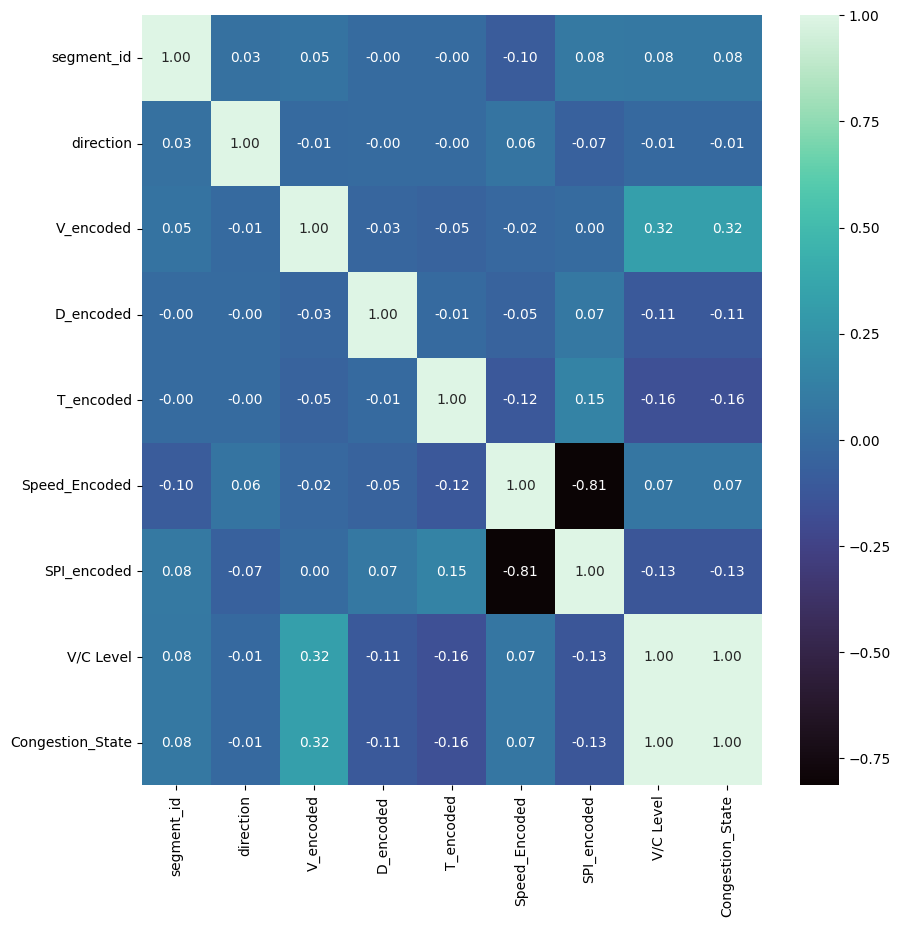

In [ ]:
# Calculate the correlation matrix for the DataFrame r_df
corr = r_df.corr()

# Set the figure size for the heatmap
plt.figure(figsize=(10, 10))

# Create a heatmap using seaborn to visualize the correlation matrix
sns.heatmap(corr, cmap="mako", annot=True, fmt=".2f")

# Display the heatmap
plt.show()

In [ ]:
r_df

,segment_id,direction,V_encoded,D_encoded,T_encoded,Speed_Encoded,SPI_encoded,V/C Level,Congestion_State
0,1133,1,1,1,2,2,3,1,1
1,1134,1,1,1,2,2,3,1,1
2,1151,2,1,1,2,2,3,1,1
3,1152,2,1,1,2,2,3,1,1
4,1153,2,1,1,2,1,4,1,1
...,...,...,...,...,...,...,...,...,...
3068525,1307,1,1,1,2,1,3,2,2
3068526,1308,3,1,1,2,2,3,2,2
3068527,1308,3,1,1,2,2,3,2,2
3068528,1309,4,1,1,2,2,3,1,1


In [ ]:
def replace_nan_with_mode(df):
    for column in df.columns:
        mode = df[column].mode()
        if not mode.empty:  # Check if mode is not empty
            df[column].fillna(mode[0], inplace=True)  # Substitute NaN with mode
    return df

# Replace NaN values in r_df
r_df = replace_nan_with_mode(r_df)

# Display the updated DataFrame
print(r_df)

       segment_id  direction  V_encoded  D_encoded  T_encoded  Speed_Encoded  \
0            1133          1          1          1          2              2   
1            1134          1          1          1          2              2   
2            1151          2          1          1          2              2   
3            1152          2          1          1          2              2   
4            1153          2          1          1          2              1   
...           ...        ...        ...        ...        ...            ...   
10385           5          3          1          1          2              2   
10386           6          3          1          1          2              2   
10387           7          3          1          1          2              2   
10388           8          3          1          1          2              1   
10389           9          3          1          1          2              1   

       SPI_encoded  V/C Level  Congesti

In [ ]:
has_nan = r_df.isnull().values.any()

if has_nan:
    print("There are NaN or null values in the DataFrame.")
else:
    print("There are no NaN or null values in the DataFrame.")

There are no NaN or null values in the DataFrame.


In [ ]:
pc = PC(data=r_df)

    # Estimate the skeleton and orientation
edges = pc.estimate()

    # Display the edges
print("Estimated edges from PC algorithm:")
print(edges)

    # If you want to create a Bayesian Network from the estimated edges
model = BayesianNetwork(edges)

    # You can now perform inference or further analysis on the model
print("Bayesian Network created:")


print(model.edges())

In [ ]:
# Assuming r_df is your DataFrame
pc = PC(data=r_df)

# Estimate the skeleton and orientation
edges = pc.estimate()

# Display the edges structure
print("Estimated edges from PC algorithm:")
print(edges)

# Check the type of edges
print("Type of edges:", type(edges))

# If edges are a specific structure, extract them correctly
# If edges is a list of tuples
if isinstance(edges, list):
    edges_list = edges
else:
    # If edges is another type (e.g., a DataFrame or a specific structure), handle it accordingly
    # Here is a way to convert it to a list of edges
    edges_list = list(edges.edges())

# Create a directed graph to check for cycles
temp_graph = nx.DiGraph()
temp_graph.add_edges_from(edges_list)

# Detect cycles in the graph
cycles = list(nx.simple_cycles(temp_graph))

if cycles:
    print("Cycles detected in the estimated edges:")
    print(cycles)
else:
    # Create a Bayesian Network from the estimated edges
    model = BayesianNetwork(edges_list)

    # Display the edges of the Bayesian Network
    print("Bayesian Network created:")
    print(model.edges())

    # Visualize the Bayesian Network using NetworkX
    G = nx.DiGraph()
    G.add_edges_from(edges_list)

    # Draw the network
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G)  # positions for all nodes
    nx.draw(G, pos, with_labels=True, arrows=True, node_size=2000, node_color='lightblue', font_size=12, font_weight='bold')
    plt.title("Bayesian Network")
    plt.show()


  0%|          | 0/5 [00:00<?, ?it/s]

Estimated edges from PC algorithm:
DAG with 9 nodes and 10 edges
Type of edges: <class 'pgmpy.base.DAG.DAG'>
Cycles detected in the estimated edges:
[['segment_id', 'Congestion_State', 'direction'], ['segment_id', 'Speed_Encoded', 'direction'], ['segment_id', 'Speed_Encoded', 'SPI_encoded', 'direction'], ['segment_id', 'SPI_encoded', 'direction']]


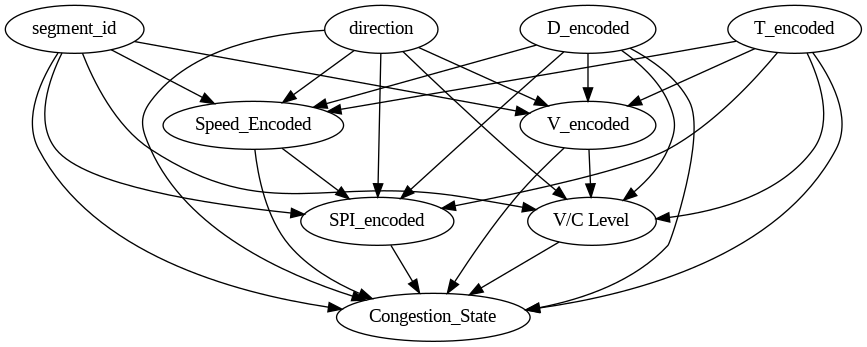

In [ ]:
nx_graph = nx.DiGraph()  # Create a directed graph
nx_graph.add_edges_from(model.edges())  # Add edges to the graph

# Step 2: Convert the NetworkX graph to pydot format and render as image
pydot_graph = nx.drawing.nx_pydot.to_pydot(nx_graph)

# Step 3: Display the image of the Bayesian Network
display(Image(pydot_graph.create_png()))

#BAYESIAN NETWORK


In [ ]:
pc = PC(r_df)

# Perform the PC algorithm to learn the skeleton and orientations
# The method `estimate` returns a Bayesian Network model which contains the learned edges
model = pc.estimate()

# Convert the learned model to a NetworkX graph
# Use DiGraph to handle directed edges
G = nx.DiGraph()
G.add_edges_from(model.edges())

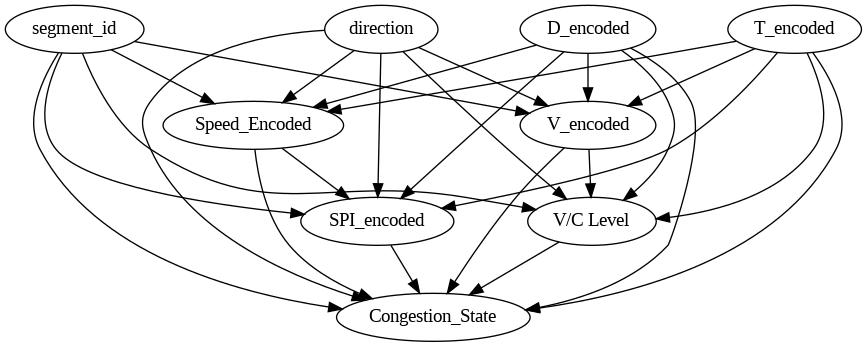

In [ ]:
display(Image((nx.drawing.nx_pydot.to_pydot(model)).create_png()))

In [ ]:
# Import the MaximumLikelihoodEstimator from pgmpy.estimators
from pgmpy.estimators import MaximumLikelihoodEstimator

# Fit the Bayesian Network model to the DataFrame r_df
# This uses Maximum Likelihood Estimation to learn the parameters (CPTs)
model.fit(r_df, estimator=MaximumLikelihoodEstimator)

d.replace({'V_encoded':{'Low':1,'Medium':2,'High':3},
           'direction':{'SB':1 ,'NB':2, 'EB':3, 'WB':4 ,'NE':5 ,'NW':6, 'SE':7, 'SW':8},
           'D_encoded':{'Weekday':1,'Weekend':2},  # This should now match cleaned values
           'T_encoded':{'AM Peak':1,'PM Peak':2,'Off-Peak':3},
           'Speed_Encoded':{'Low':1,'Medium':2,'High':3},
           'SPI_encoded':{'Very smooth':1,'Smooth':2,'Mild':3,'Heavy':4},
           'V/C Level':{'A':1,'B':2,'C':3,'D':4,'E':5,'F':6},           
           }, inplace=True)

In [ ]:
with open('bayesian_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

print("Model saved successfully.")

Model saved successfully.


In [ ]:
# Import the necessary scoring functions from pgmpy.estimators
from pgmpy.estimators import BicScore, K2Score

# Calculate the BIC score for the model based on the data in r_df
bic = BicScore(r_df).score(model)
print(f"BIC Score: {bic}")

# Calculate the K2 score for the model based on the data in r_df
k2 = K2Score(r_df).score(model)
print(f"K2 Score: {k2}")

In [ ]:
from pgmpy.inference import VariableElimination

inference = VariableElimination(model)

example_input = {
    'V_encoded': 2,
    'D_encoded': 1,
    'T_encoded': 2,
    'Speed_Encoded': 1,
    'SPI_encoded': 4,
    'V/C Level': 6
}

predicted_state = inference.map_query(variables=['Congestion_State'], evidence=example_input)

print("Predicted Congestion State:", predicted_state)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Predicted Congestion State: {'Congestion_State': 6}


In [ ]:
example_input_1 = {
    'V_encoded': 3,
    'D_encoded': 1,
    'T_encoded': 2,
    'Speed_Encoded': 1,
    'SPI_encoded': 4,
    'V/C Level': 6
}

predicted_state_1 = inference.map_query(variables=['Congestion_State'], evidence=example_input_1)
print("Predicted Congestion State (Peak Hour):", predicted_state_1)


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Predicted Congestion State (Peak Hour): {'Congestion_State': 6}


**The prediction indicates a heavy congestion state (encoded as 6) during peak hours based on the provided traffic conditions.**

In [ ]:
example_input_2 = {
    'V_encoded': 1,
    'D_encoded': 1,
    'T_encoded': 3,
    'Speed_Encoded': 2,
    'SPI_encoded': 1,
    'V/C Level': 1
}

predicted_state_2 = inference.map_query(variables=['Congestion_State'], evidence=example_input_2)
print("Predicted Congestion State (Off-Peak):", predicted_state_2)


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Predicted Congestion State (Off-Peak): {'Congestion_State': 1}


In [ ]:
from pgmpy.estimators import BicScore, K2Score

bic = BicScore(r_df).score(model)
print(f"BIC Score: {bic}")

k2 = K2Score(r_df).score(model)
print(f"K2 Score: {k2}")


BIC Score: -371106485.170178
K2 Score: 46792291.63977082


#TEST TRAIN SPLIT

In [ ]:
from pgmpy.estimators import MaximumLikelihoodEstimator, K2Score
from pgmpy.estimators import BayesianEstimator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [ ]:
# Sample 80% of the data from r_df, ensuring reproducibility with a random seed
sampled_data = r_df.sample(frac=0.8, random_state=42)

# Split the sampled data into training and testing sets
# 80% of the sampled data will be used for training, and 20% for testing
train_data, test_data = train_test_split(sampled_data, test_size=0.2, random_state=42)

In [ ]:
# Using the BDeu (Bayesian Dirichlet equivalent uniform) prior with an equivalent sample size of 5
model.fit(train_data, estimator=BayesianEstimator, prior_type="BDeu", equivalent_sample_size=5)

In [ ]:
with open('bayesian_model2.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model has been pickled and saved as 'bayesian_model2.pkl'.")

In [ ]:
with open('predictions.pkl', 'wb') as file:
    pickle.dump(predictions, file)

print("Predictions have been pickled and saved as 'predictions.pkl'.")

Predictions have been pickled and saved as 'predictions.pkl'.


In [ ]:
filename = '/content/drive/MyDrive/bayesian_model2.pkl'

with open(filename, 'rb') as file:
    model = pickle.load(file)

print(f'Model has been loaded from {filename}')

In [ ]:
filename = '/content/predictions.pkl'

with open(filename, 'rb') as file:
    predictions = pickle.load(file)

print(f'Model has been loaded from {filename}')

Model has been loaded from /content/predictions.pkl


In [ ]:
predictions = model.predict(test_data.drop(columns=['Congestion_State']))

  0%|          | 0/2902 [00:00<?, ?it/s]

In [ ]:
test_data = pd.read_csv('/content/test_data.csv')
train_data = pd.read_csv('/content/train_data.csv')

In [ ]:
accuracy = accuracy_score(test_data['Congestion_State'], predictions['Congestion_State'])
f1 = f1_score(test_data['Congestion_State'], predictions['Congestion_State'], average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9398
F1 Score: 0.9287


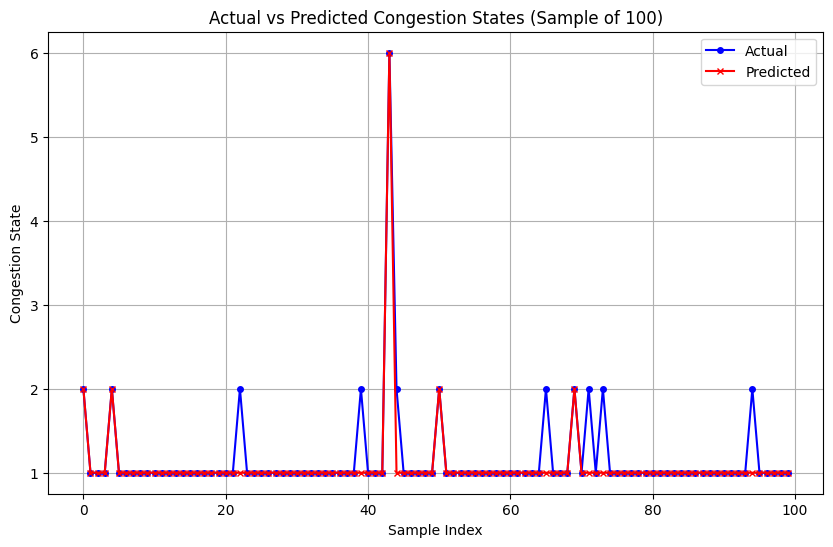

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # Make sure to import pandas

# Assuming predictions and test_data are already aligned and have the same indices
actual = test_data['Congestion_State'].reset_index(drop=True)
predicted = predictions['Congestion_State'].reset_index(drop=True)

# Creating a comparison DataFrame for plotting
comparison_df = pd.DataFrame({
    'Actual': actual,
    'Predicted': predicted
})

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))

# Plotting for the first 100 values (to keep the plot readable)
comparison_df_sample = comparison_df.head(100)

# Creating a line plot for better visualization
plt.plot(comparison_df_sample['Actual'], label='Actual', color='b', marker='o', markersize=4)
plt.plot(comparison_df_sample['Predicted'], label='Predicted', color='r', marker='x', markersize=4)

plt.xlabel('Sample Index')
plt.ylabel('Congestion State')
plt.title('Actual vs Predicted Congestion States (Sample of 100)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Loop over all nodes and print their corresponding CPTs
for node in model.nodes():
    cpd = model.get_cpds(node)
    print(f"CPT for {node}:\n{cpd}\n")


CPT for segment_id:
+------------------+-------------+
| segment_id(1)    | 0.000800392 |
+------------------+-------------+
| segment_id(2)    | 0.000738846 |
+------------------+-------------+
| segment_id(3)    | 0.00104658  |
+------------------+-------------+
| segment_id(4)    | 0.00123121  |
+------------------+-------------+
| segment_id(5)    | 0.000923484 |
+------------------+-------------+
| segment_id(6)    | 0.00104658  |
+------------------+-------------+
| segment_id(7)    | 0.000800392 |
+------------------+-------------+
| segment_id(8)    | 0.000923484 |
+------------------+-------------+
| segment_id(9)    | 0.00116967  |
+------------------+-------------+
| segment_id(10)   | 0.000492662 |
+------------------+-------------+
| segment_id(11)   | 0.0014774   |
+------------------+-------------+
| segment_id(12)   | 0.000800392 |
+------------------+-------------+
| segment_id(13)   | 0.00098503  |
+------------------+-------------+
| segment_id(14)   | 0.000738846 |


#Scenario Testing for Inference

In [ ]:
inference = VariableElimination(model)

In [ ]:
# Scenario 1: Variable Elimination
query_1 = inference.map_query(variables=['Congestion_State'], evidence={
    'segment_id': 15,
    'direction': 2,
    'D_encoded': 1,
    'T_encoded': 1,
    'V/C Level': 5,
    'SPI_encoded': 3,
    'Speed_Encoded': 1,
    'V_encoded': 3
})

print(f"Predicted Congestion State for Scenario 1: {query_1['Congestion_State']}")


#Performance metrics and Evaluation

In [ ]:
data = r_df
# Example: Renaming columns to match the model
r_df.rename(columns={
    'segment_id': 'segment',
    'direction': 'direction',
    'V_encoded': 'vehicle count',
    'D_encoded': 'day',
    'T_encoded': 'time',
    'Speed_Encoded': 'speed',
    'SPI_encoded': 'SPI',
    'V/C Level': 'V/C',
    'Congestion_State': 'Congestion state'
}, inplace=True)


structure_bic_score = structure_score(
    model=model,
    data=data,
    scoring_method="bic"  # Options: "bic", "k2", "bdeu", "bds"
)
print("Structure Score (BIC):", structure_bic_score)

# Example of using `fisher_c` to test data faithfulness to the model's structure
fisher_p_value = fisher_c(
    model=model,
    data=data,
    ci_test=CITests.chi_square,
    show_progress=True
)
print("Fisher C Score (P-value):", fisher_p_value)


bic = BicScore(r_df).score(model)
print(f"BIC Score: {bic}")

k2 = K2Score(r_df).score(model)
print(f"K2 Score: {k2}")


Structure Score (BIC): -163833263.63758084


100%|██████████| 36/36 [00:26<00:00,  1.38it/s]

Fisher C Score (P-value): 7.75922659457251e-10
BIC Score: -163833263.63758084
K2 Score: 24988806.581447426


In [ ]:
from sklearn.metrics import r2_score

# Assuming 'actual_values' contains the true values and 'predictions_df' contains the predicted values
score = r2_score(actual_values, predictions_df)  # This will give a value like 0.93478
percentage_score = score * 100  # Convert to percentage

print(f'Model Score (Percentage): {percentage_score:.2f}%')


Model Score (Percentage): 99.77%


**Hierarchical Dependancy graph**

In [ ]:
r_df = pd.DataFrame(r_df)

# Check if 'Congestion_State' exists and sample only if it does
if 'Congestion_State' in r_df.columns:
    # Use only 10% of the data for demonstration
    r_df = r_df.sample(frac=1, random_state=42)  # Use random_state for reproducibility

    # Store actual values
    actual_values = r_df['Congestion_State'].reset_index(drop=True)  # Ensure it's a Series with a reset index

    # Prepare the DataFrame by dropping the target variable
    features = r_df.drop(columns=['Congestion_State'])

    # Make predictions on the entire features DataFrame
    predictions_df = model.predict(features)

    # Convert predictions to 1D if they are in 2D shape
    if predictions_df.shape[1] == 1:  # Check if it's 2D with a single column
        predictions_df = predictions_df.values.flatten()  # Use .values to get a NumPy array and flatten it

    # Check the sizes
    print("Actual Values Size:", actual_values.shape)
    print("Predicted Values Size:", predictions_df.shape)

In [ ]:
# Create a new DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual Values': actual_values,
    'Predicted Values': predictions_df
})

# Save the DataFrame to a CSV file
results_df.to_csv('actual_vs_predicted.csv', index=False)

print("The actual and predicted values have been saved to 'actual_vs_predicted.csv'.")


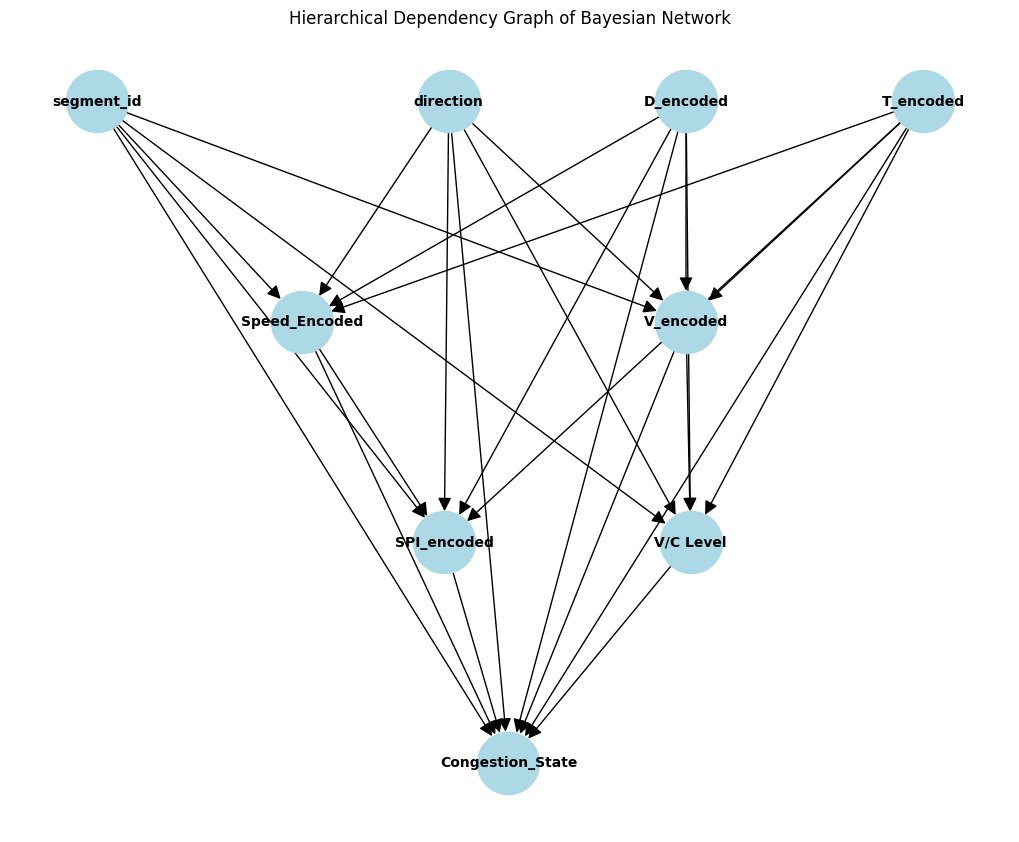

In [ ]:
# Create a directed graph
G = nx.DiGraph()

# Add edges from Bayesian Network model to the graph
for edge in model.edges():
    G.add_edge(*edge)

plt.figure(figsize=(10, 8))

try:
    pos = nx.nx_pydot.graphviz_layout(G, prog="dot")
except ImportError:
    pos = nx.spring_layout(G)

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold", arrowsize=20)
plt.title("Hierarchical Dependency Graph of Bayesian Network")
plt.show()

**Probability flow diagram**

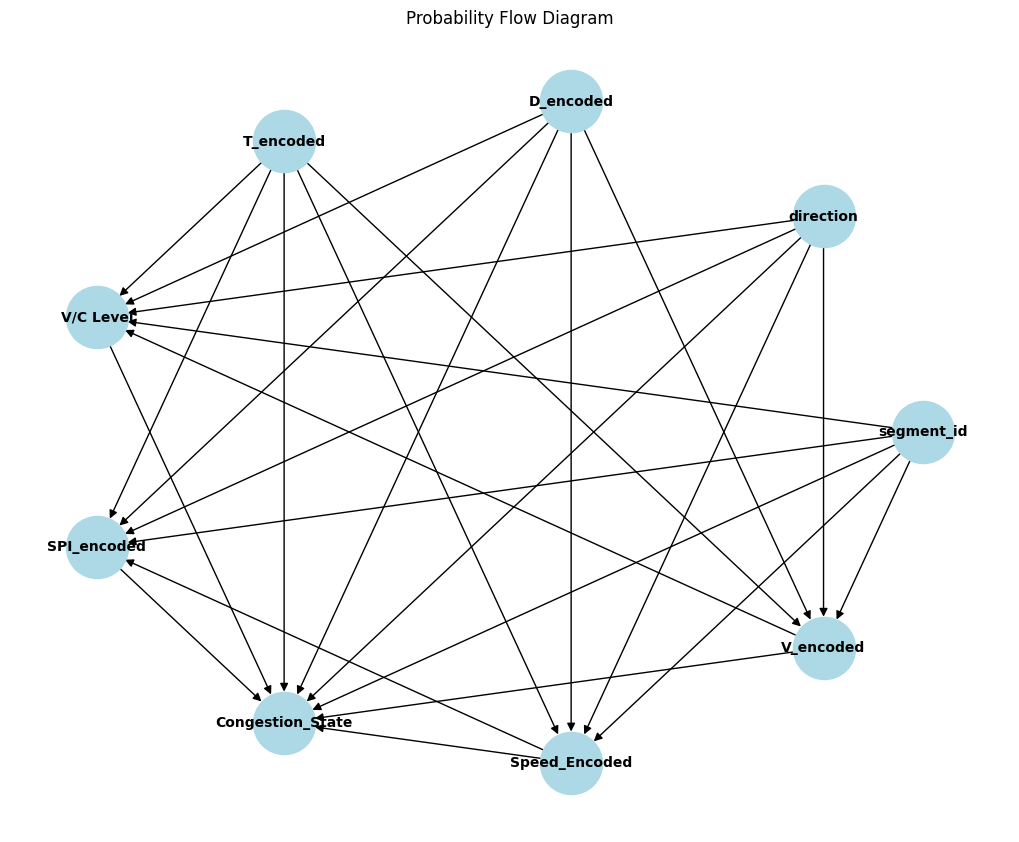

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Probability Flow Diagram with Circular Layout
plt.figure(figsize=(10, 8))
pos = nx.circular_layout(model)  # Alternative layout for better visualization

# Drawing the graph with simplified parameters
nx.draw(model, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold', arrows=True, arrowstyle='-|>', arrowsize=12)
plt.title("Probability Flow Diagram")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import plotly.express as px

mae = mean_absolute_error(actual_values, predictions_df)
mse = mean_squared_error(actual_values, predictions_df)
rmse = mse ** 0.5
r2 = r2_score(actual_values, predictions_df)

# Create a DataFrame for the errors
errors = actual_values - predictions_df
error_df = pd.DataFrame({'Actual': actual_values, 'Predicted': predictions_df, 'Error': errors})

### 1. Time Series Plot of Actual vs. Predicted Values
plt.figure(figsize=(12, 6))
plt.plot(actual_values, label='Actual Values', color='blue', marker='o', markersize=5, linestyle='-', alpha=0.7)
plt.plot(predictions_df, label='Predicted Values', color='red', marker='x', markersize=5, linestyle='-', alpha=0.7)
plt.title('Time Series Plot of Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Congestion State', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

### 2. Performance Metrics Plot (e.g., RMSE, MAE)
metrics = {'MAE': mae, 'RMSE': rmse, 'R^2': r2}
plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')
plt.title('Performance Metrics', fontsize=16)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Metrics', fontsize=14)
plt.tight_layout()
plt.show()

### 3. Predicted Value Distribution Overlay on Actual Distribution
plt.figure(figsize=(12, 6))
sns.kdeplot(actual_values, label='Actual Values', color='blue', fill=True, alpha=0.5)
sns.kdeplot(predictions_df, label='Predicted Values', color='red', fill=True, alpha=0.5)
plt.title('Predicted Value Distribution Overlay on Actual Distribution', fontsize=16)
plt.xlabel('Congestion State', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

### 4. Interactive 3D Scatter Plot of Actual vs. Predicted
fig = px.scatter_3d(
    error_df,
    x='Actual',
    y='Predicted',
    z='Error',
    title='Interactive 3D Scatter Plot of Actual vs. Predicted',
    labels={'Actual': 'Actual Values', 'Predicted': 'Predicted Values', 'Error': 'Prediction Error'},
    color='Error',
    color_continuous_scale='Viridis'
)
fig.show()

### 5. Heatmap of Prediction Errors
plt.figure(figsize=(12, 6))
sns.heatmap(error_df[['Actual', 'Predicted', 'Error']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Prediction Errors', fontsize=16)
plt.tight_layout()
plt.show()

### 6. Normalized Error Plot
normalized_error = (errors - errors.min()) / (errors.max() - errors.min())
plt.figure(figsize=(12, 6))
plt.plot(normalized_error, color='orange', linestyle='-', marker='o', markersize=3)
plt.title('Normalized Prediction Error', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Normalized Error', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

### 7. Violin Plot of Actual vs. Predicted Values
plt.figure(figsize=(12, 6))
sns.violinplot(data=[actual_values, predictions_df], inner='quartile')
plt.xticks([0, 1], ['Actual Values', 'Predicted Values'])
plt.title('Violin Plot of Actual vs. Predicted Values', fontsize=16)
plt.ylabel('Congestion State', fontsize=14)
plt.tight_layout()
plt.show()

### 8. Rolling Mean of Actual vs. Predicted Values
rolling_actual = actual_values.rolling(window=10).mean()
rolling_predicted = pd.Series(predictions_df).rolling(window=10).mean()
plt.figure(figsize=(12, 6))
plt.plot(rolling_actual, label='Rolling Mean of Actual Values', color='blue', linestyle='-')
plt.plot(rolling_predicted, label='Rolling Mean of Predicted Values', color='red', linestyle='-')
plt.title('Rolling Mean of Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Congestion State', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

### 9. Predicted vs. Actual Histogram with Overlay
plt.figure(figsize=(12, 6))
sns.histplot(actual_values, bins=30, color='blue', label='Actual Values', kde=True, stat='density', alpha=0.5)
sns.histplot(predictions_df, bins=30, color='red', label='Predicted Values', kde=True, stat='density', alpha=0.5)
plt.title('Predicted vs. Actual Histogram with Overlay', fontsize=16)
plt.xlabel('Congestion State', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


<Figure size 600x500 with 0 Axes>

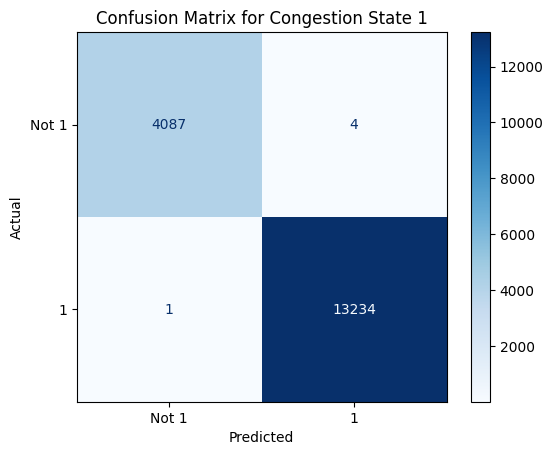

<Figure size 600x500 with 0 Axes>

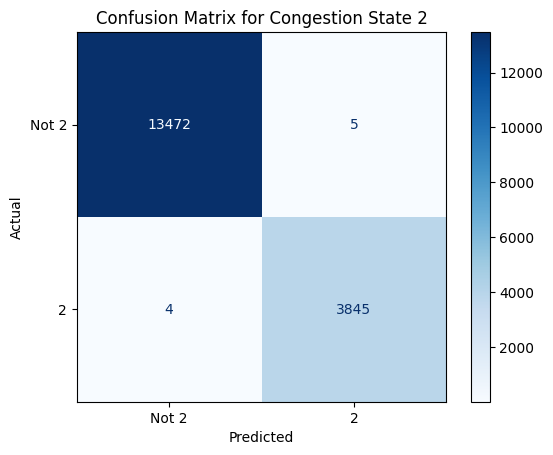

<Figure size 600x500 with 0 Axes>

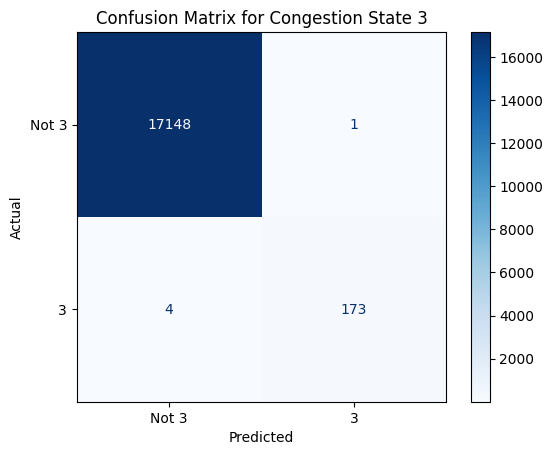

<Figure size 600x500 with 0 Axes>

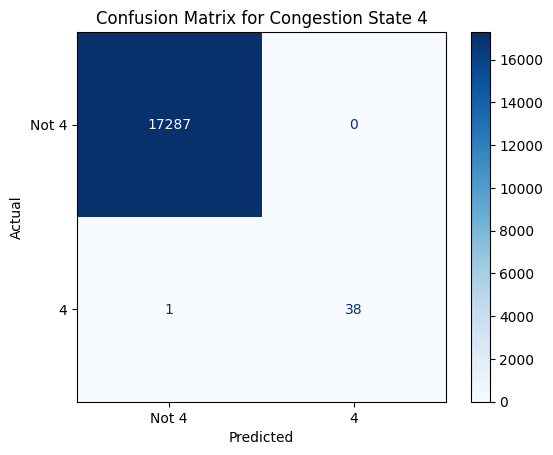

<Figure size 600x500 with 0 Axes>

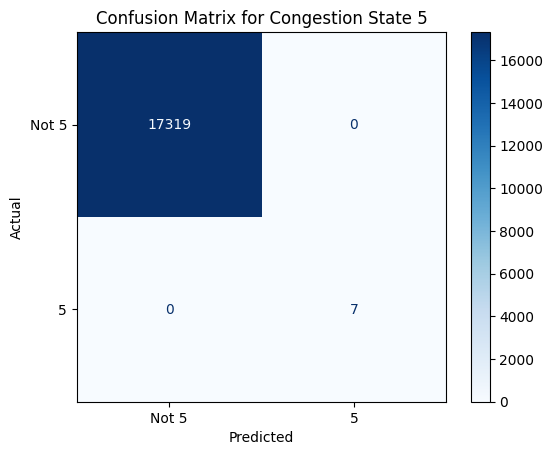

<Figure size 600x500 with 0 Axes>

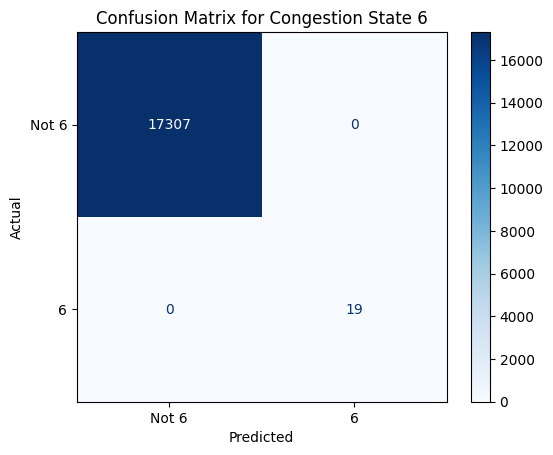

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

data = pd.read_csv("actual_vs_predicted.csv")
actual_values = data.iloc[:, 0]
predicted_values = data.iloc[:, 1]

for state in [1, 2, 3, 4, 5, 6]:
    actual_binary = (actual_values == state).astype(int)
    predicted_binary = (predicted_values == state).astype(int)

    conf_matrix = confusion_matrix(actual_binary, predicted_binary)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[f'Not {state}', f'{state}'])

    plt.figure(figsize=(6, 5))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix for Congestion State {state}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.savefig(f'confusion_matrix_state_{state}.png', dpi=300)

    plt.show()

In [ ]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(actual_values, predicted_values)
print("Matthews Correlation Coefficient (MCC):", mcc)


Matthews Correlation Coefficient (MCC): 0.9984269923228536


In [ ]:
from sklearn.metrics import hamming_loss

hamming = hamming_loss(actual_values, predicted_values)
print("Hamming Loss:", hamming)


Hamming Loss: 0.0005771672630728385
